# Sentiment Analysis with BERT

## Dependencies

In [25]:
import torch
import numpy as np
import pandas as pd
import requests
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from bs4 import BeautifulSoup
import re
from tqdm import tqdm
from tqdm.notebook import tqdm_notebook
import matplotlib.pyplot as plt

## Loading BERT

Load BERT tokenizer and model

In [19]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

## Data Collection

Scrape reviews from Yelp for Paulo & Suzanne restaurant (go through first 8 pages of reviews)

In [20]:
reviews = []
for i in tqdm(range(9)):
    url = f'https://www.yelp.ca/biz/paulo-and-suzanne-montr%C3%A9al?start={i*10}'
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    regex = re.compile('.*comment.*')
    results = soup.find_all('p', {'class': regex})
    current_page_reviews = [result.text for result in results]
    reviews = reviews + current_page_reviews

100%|██████████| 9/9 [00:27<00:00,  3.07s/it]


## Data Loading

Load the data into a Pandas dataframe

In [21]:
df = pd.DataFrame(data=np.array(reviews), columns=['review'])
df.head()

,review
0,Best poutine in the Greater Montreal Area!Grea...
1,Un testo bien sympathique avec un grand choix ...
2,Poutine. Such a simple meal but sometimes it's...
3,If you crave Poutine late night then this is t...
4,Best comfort food I've had in MTLThe food is a...


## Obtaining sentiment scores for reviews

Define function to output an integer sentiment score (ranging from 1 to 5) of a given review

In [22]:
def score(review):
    # tokenize
    tokens = tokenizer.encode(review, return_tensors='pt')
    # get BERT scores
    bert_scores = model(tokens)
    # extract index of largest score (ranges from 0 to 4) and add 1
    sentiment_score = int(torch.argmax(bert_scores.logits)) + 1
    return sentiment_score

Get sentiment scores for each review and store in the dataframe

In [23]:
tqdm_notebook.pandas()
df['sentiment'] = df['review'].progress_apply(lambda x: score(x))

  0%|          | 0/91 [00:00<?, ?it/s]

Get histogram of review scores

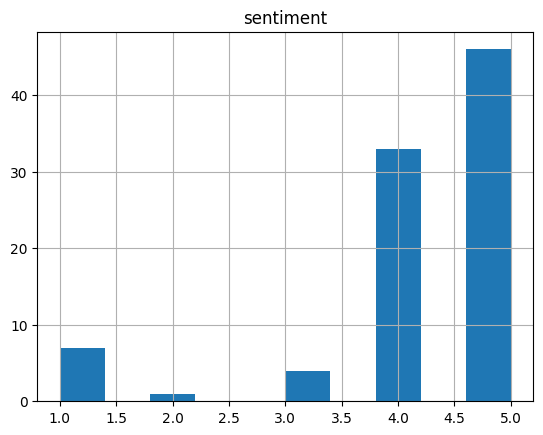

In [26]:
df.hist(column='sentiment')
plt.show()